In [1]:
#1
import numpy as np
a=np.random.random((10, 3))
#print(a)
print(np.min(abs(a-0.5)+0.5, axis=1))
#print([b[np.abs(b-0.5).argmin()] for b in a])

[0.54107593 0.58408082 0.51534209 0.53766345 0.66733327 0.50354891
 0.72706521 0.64123092 0.54841363 0.78893221]


In [3]:
#2
import numpy as np
a=np.random.random((6, 6))
print(a)
#d=[np.min(a[:, b]) for b in range(6)]
#c=[np.sum(b) for b in a]
c=a.sum(axis=1)
d=a.min(axis=0)
#print(c)
#print(d)
#print([c[m]/np.min(a[:, m]) for m in range(6)])
print(c/d)

[[0.22176254 0.81979778 0.14401187 0.4027753  0.18710732 0.13368915]
 [0.33083132 0.07080323 0.1555916  0.54972365 0.78815499 0.35792781]
 [0.24518068 0.66588011 0.87107089 0.82699977 0.28711521 0.77632988]
 [0.35258101 0.56771926 0.59662868 0.7084584  0.94145747 0.33053568]
 [0.66125117 0.18795305 0.73199604 0.27488106 0.91163398 0.36709719]
 [0.11802316 0.97394416 0.97718575 0.11496625 0.36191321 0.00779446]]
[ 16.17601186  31.82104057  25.50190103  30.4209328   16.75408815
 327.64648082]


In [14]:
#3
import numpy as np
x=np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
k=np.array([x[i] for i in range(1, 9) if x[i-1] == 0]).max()
print(k)

5


In [18]:
#4
import numpy as np
x=np.ones(10)
i=np.array([0, 1, 2, 3, 5, 5, 5, 8])
for b in i: x[b]+=1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [20]:
#5
import numpy as np
a = np.arange(16).reshape(4, 4)
#b={k: [] for k in range(7)}
b=[np.diagonal(a[:, ::-1], k) for k in range(3, -3, -1)]
print(b)

[array([0]), array([1, 4]), array([2, 5, 8]), array([ 3,  6,  9, 12]), array([ 7, 10, 13]), array([11, 14])]


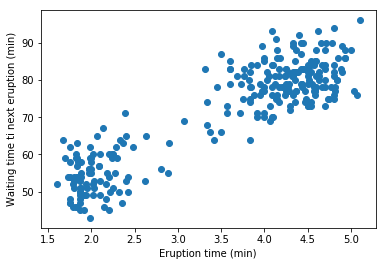

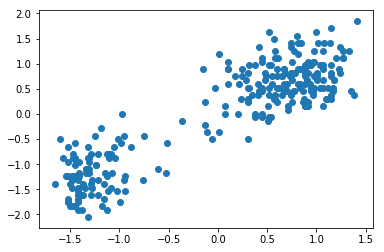

[24.98391468 54.59204481]


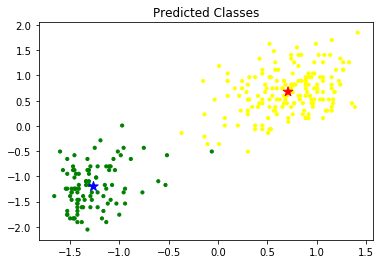

In [6]:
#6
import numpy as np
data = np.loadtxt('Oldfaithful.txt', skiprows=0)[:, :]
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()
n=np.mean(data, axis=0)
data=(data-n)/(np.mean((data-n)**2, axis=0))**(1/2)    
plt.scatter(*data.T)
plt.show()
centroids=np.random.uniform(-2, 2, 4).reshape((2, 2))
#co=(len(data))/2
co=int(data.size/2)
#co=sum(1 for _ in data)
#dist = np.linalg.norm(data_)
#print(centroids)
#print(dist)
#np.argmin(dist, axis=0)
def getlabels(pt, centroids, co):
    a=np.vstack((pt-centroids[0], pt-centroids[1]))
    b=np.linalg.norm(a,axis=1)
    dist=b.reshape(2,co).transpose()
    return np.argmin(dist, axis=1)
def kmeans(data,centroids,diagnosis, co):
    labels=getlabels(data, centroids, co)
    x=centroids[0]
    y=centroids[1]
    d=1
    while d>diagnosis:
        x0=x
        y0=y
        x=np.sum(data[labels==1],axis=0)/np.sum(labels)
        y=np.sum(data[labels==0],axis=0)/(co-np.sum(labels))
        labels = getlabels(data, np.array([y,x]), co)
        d=max(np.linalg.norm(x-x0),np.linalg.norm(y-y0))
    centroids=np.array([y,x])
    distortion=np.array([np.sum((np.linalg.norm(data[labels==1]-centroids[1]))**2),np.sum((np.linalg.norm(data[labels==0]-centroids[0]))**2)])
    return centroids, distortion    
centroids, d=kmeans(data,centroids,0.00000001, co)
print(d)
labels = getlabels(data, centroids, co)
import matplotlib.pyplot as plt
%matplotlib inline
labels = getlabels(data, centroids, co)
plt.scatter(*data.T, c=np.where(labels, "green", "yellow"), s=10)
plt.scatter(*centroids.T, c=["red", "blue"], s=100, marker='*')
plt.title('Predicted Classes')
plt.show()